# CNN 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from pathlib import Path
from IPython.display import Audio
from utils import read_file, transform_path

import fastai
from fastai.vision import * 

import librosa
import librosa.display

random_state = 2020
sns.set( palette='cubehelix')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

print("FastAI Version:", fastai.__version__)
print("Librosa Version:", librosa.__version__)

ModuleNotFoundError: No module named 'utils'

In [2]:
NSynth_Images = Path('../data/non_images2')

In [3]:
instrument_family_pattern = r'(\w+)_\w+_\d+-\d+-\d+.png$'

data = (ImageList.from_folder(NSynth_Images)
            .split_by_folder()
            .label_from_re(instrument_family_pattern)
            .databunch())
data.c, data.classes

(8,
 ['brass', 'flute', 'guitar', 'keyboard', 'mallet', 'reed', 'string', 'vocal'])

In [4]:
xs, ys = data.one_batch()

(torch.Size([64, 3, 40, 251]), torch.Size([64]))

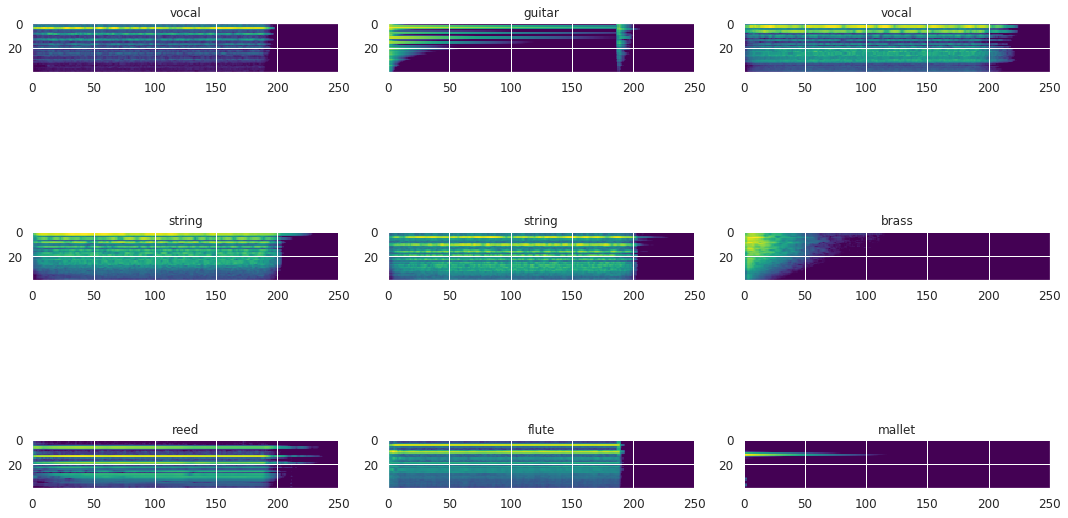

In [6]:
data.show_batch(3, figsize=(15, 10), hide_axis=False)

epoch,train_loss,valid_loss,accuracy,time
0,2.333514,2.303407,0.012500,00:02
1,1.498919,3.692823,0.162500,00:01
2,1.059659,4.254591,0.243750,00:01
3,0.804488,3.495219,0.375000,00:01
4,0.651067,1.252066,0.693750,00:01
5,0.536367,1.912775,0.575000,00:01
6,0.465584,1.402268,0.568750,00:01
7,0.385921,1.864535,0.668750,00:01
8,0.310901,1.519552,0.675000,00:01
9,0.246166,1.740766,0.718750,00:01


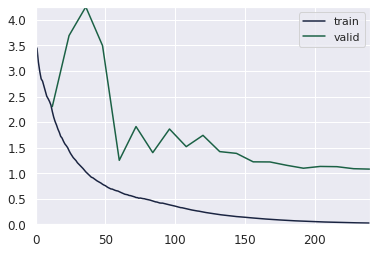

In [7]:
learn = cnn_learner(data, models.resnet18, pretrained=False, metrics=accuracy, callback_fns=ShowGraph)

learn.fit_one_cycle(20, 1e-3)

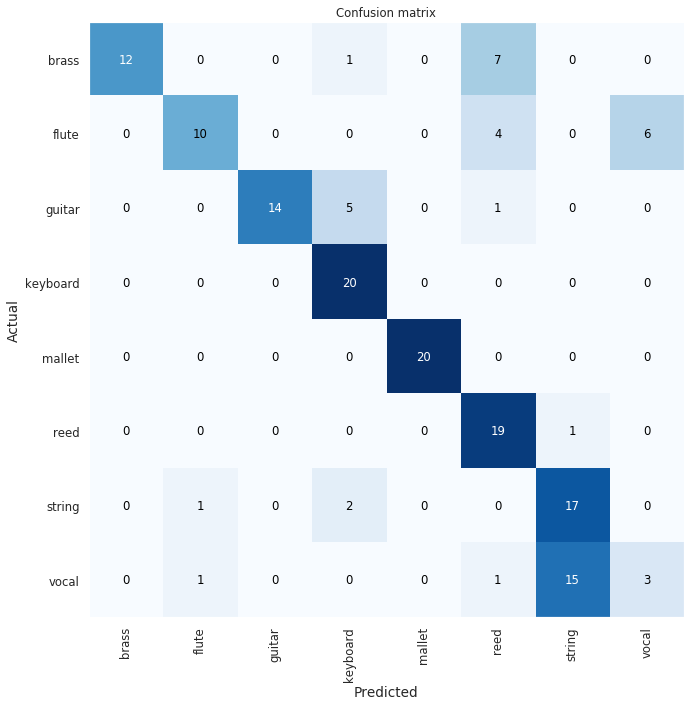

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=70)

In [9]:
display(interp.most_confused())

[('vocal', 'string', 15),
 ('brass', 'reed', 7),
 ('flute', 'vocal', 6),
 ('guitar', 'keyboard', 5),
 ('flute', 'reed', 4),
 ('string', 'keyboard', 2),
 ('brass', 'keyboard', 1),
 ('guitar', 'reed', 1),
 ('reed', 'string', 1),
 ('string', 'flute', 1),
 ('vocal', 'flute', 1),
 ('vocal', 'reed', 1)]

epoch,train_loss,valid_loss,accuracy,time
0,2.513083,2.029254,0.262500,00:05
1,1.785211,2.194282,0.256250,00:02
2,1.290517,1.557283,0.562500,00:02
3,0.987993,1.767886,0.631250,00:02
4,0.793523,3.049170,0.618750,00:02
5,0.662751,2.708213,0.631250,00:02
6,0.570638,2.438984,0.643750,00:02
7,0.484020,2.506578,0.675000,00:02
8,0.412336,2.287128,0.668750,00:02
9,0.333238,2.022482,0.675000,00:02


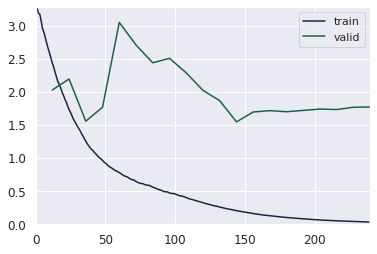

In [11]:
learn = cnn_learner(data, models.densenet121, pretrained=False, metrics=accuracy, callback_fns=ShowGraph)

learn.fit_one_cycle(20, 1e-3)

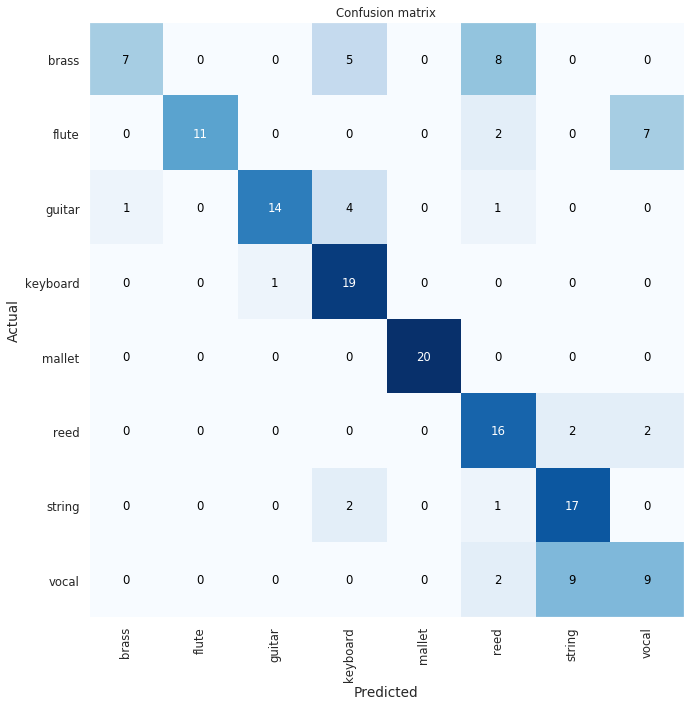

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10, 10), dpi=70)

In [13]:
display(interp.most_confused())

[('vocal', 'string', 9),
 ('brass', 'reed', 8),
 ('flute', 'vocal', 7),
 ('brass', 'keyboard', 5),
 ('guitar', 'keyboard', 4),
 ('flute', 'reed', 2),
 ('reed', 'string', 2),
 ('reed', 'vocal', 2),
 ('string', 'keyboard', 2),
 ('vocal', 'reed', 2),
 ('guitar', 'brass', 1),
 ('guitar', 'reed', 1),
 ('keyboard', 'guitar', 1),
 ('string', 'reed', 1)]

epoch,train_loss,valid_loss,accuracy,time
0,2.485173,2.565115,0.125000,00:04
1,1.723432,2.938014,0.187500,00:03
2,1.244263,1.937057,0.518750,00:03
3,0.967884,1.547649,0.618750,00:03
4,0.821356,3.573788,0.543750,00:03
5,0.700381,6.263874,0.531250,00:03
6,0.580654,3.650172,0.568750,00:03
7,0.484460,2.271045,0.600000,00:03
8,0.399129,1.655622,0.718750,00:03
9,0.329135,2.415518,0.656250,00:03


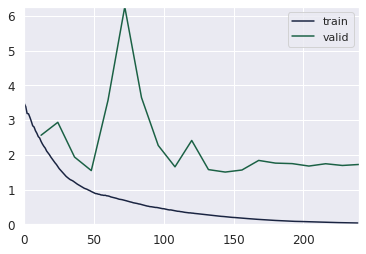

In [14]:
learn = cnn_learner(data, models.densenet169,  pretrained=False, metrics=accuracy, callback_fns=ShowGraph)

learn.fit_one_cycle(20, 1e-3)